**Central limit theorem**

- The Central Limit Theorem states that average of your sample means will be the population mean.

- The sampling distribution of the sample means approaches a normal distribution as the sample 
size gets larger — no matter what the shape of the population distribution. 
This fact holds especially true for sample sizes over 30.

- All this is saying is that as you take more samples, especially large ones, your graph of the 
sample means will look more like a normal distribution.

In [2]:
import numpy as np
import seaborn as sns
import statistics as stat

**Sampling from the normally-distributed population**

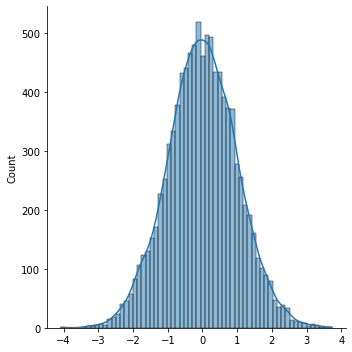

In [21]:
# Simulating a normally distributed population
x = np.random.normal(size=10000)
sns.displot(x, kde=True)

In [22]:
# Sampling from a normally distributed population
x_sample = np.random.choice(x, size=10, replace=False)
x_sample

array([-0.04421173, -0.21205481,  0.21916254, -1.04945703, -1.31208353,
       -0.54009956, -1.23608993, -2.48442635,  0.27707936,  1.25941415])

In [23]:
stat.mean(x_sample)

-0.5122766898959931

In [24]:
def sample_mean_calculator(population_array, sample_size, n_samples):
    sample_means=[]
    for i in range(n_samples):
        sample = np.random.choice(population_array, size=sample_size, replace=False)
        sample_mean = stat.mean(sample)
        sample_means.append(sample_mean)
    return sample_means

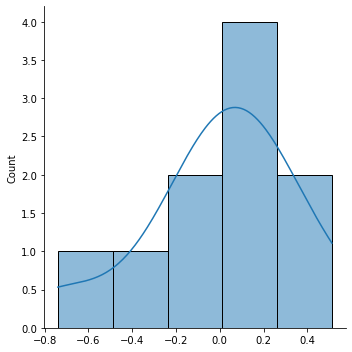

In [25]:
sns.displot(sample_mean_calculator(x, 10, 10), kde=True)

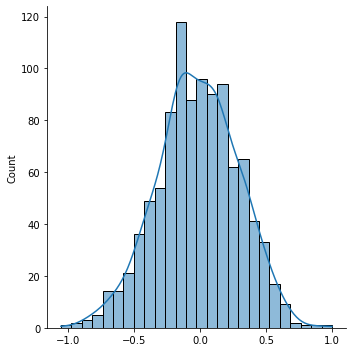

In [26]:
'''
The more samples we take, the more likely that 
the sampling distribution of the means will be normally-distributed
'''
sns.displot(sample_mean_calculator(x, 10, 1000), kde=True)

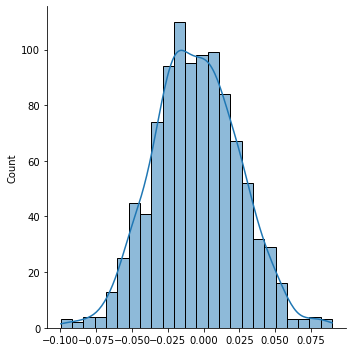

In [27]:
'''
The larger the sample, the tighter the sample means will tend to be around the population mean
'''
sns.displot(sample_mean_calculator(x, 1000, 1000), kde=True)

**Sampling from a skewed population**

In [28]:
from scipy.stats import skewnorm

In [29]:
s = skewnorm.rvs(12, size=10000) #Generate random numbers

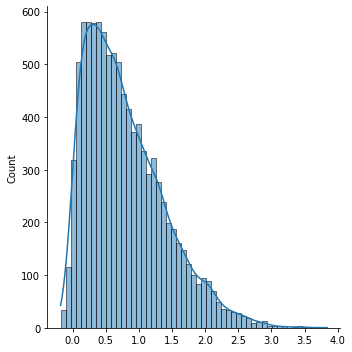

In [30]:
sns.displot(s, kde=True)

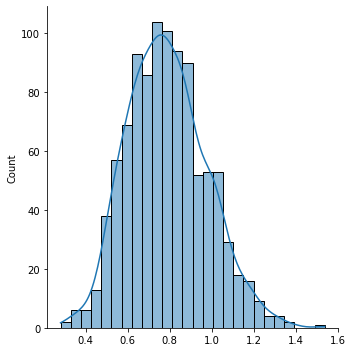

In [32]:
sns.displot(sample_mean_calculator(s,10,1000), kde=True)

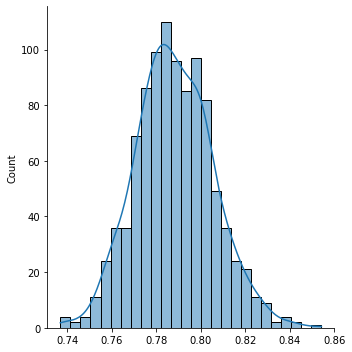

In [34]:
sns.displot(sample_mean_calculator(s,1000,1000), kde=True)

**Sampling from a multimodal distribution**

In [43]:
m = np.concatenate((np.random.normal(size=10000), np.random.normal(loc = 4.0, size=10000)))
# loc: Mean (“centre”) of the distribution.
m

array([-0.57233006,  2.20207767,  1.68124005, ...,  3.58557675,
        3.32164888,  2.97395519])

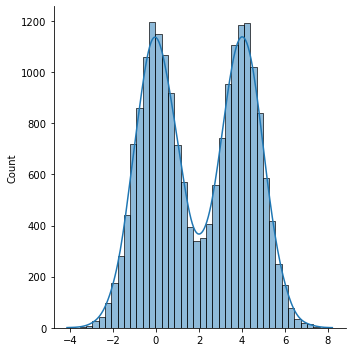

In [44]:
sns.displot(m, kde=True)

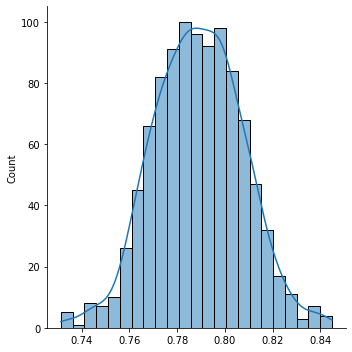

In [45]:
sns.displot(sample_mean_calculator(s,1000,1000), kde=True)

**sampling from a uniform population**

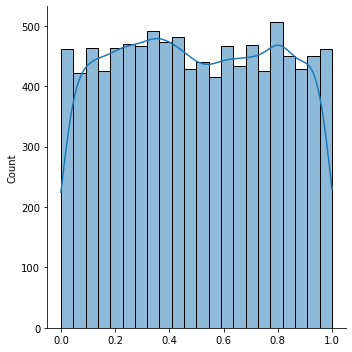

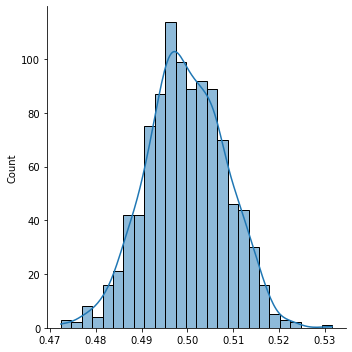

In [47]:
u = np.random.uniform(size=10000)
sns.displot(u, kde=True)
sns.displot(sample_mean_calculator(u,1000,1000), kde=True)

*Sampling means from any distribution produces a normal sampling distribution*

Therefore, with large enough sample sizes, we can assume the sampling distribution of the means will be normally distributed, allowing us to run statistical tests that are configured for normal distributions. All of the most popular statistical tests are configured this way.

As an example of such a statistical test, the "t-test" allows us to infer whether two samples come from different populations (say, an experimental group and a control group). Thanks to the central limit theorem, we can use this test even if we have no idea what the underlying distribution of the population is, which is most of the time.